In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
file_path=r"C:\Users\abhin\Desktop\Data_set\loan_data.csv"
loan_df=pd.read_csv(file_path)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_df['Credit_History'].unique()

array([ 1.,  0., nan])

In [4]:
loan_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [5]:
shape=loan_df.shape    # it gives number of rows and column of the data
shape

(614, 13)

In [6]:
size=loan_df.size      # it gives multiple of rows and column
size

7982

In [7]:
dtypes=loan_df.dtypes    # it gives information about which column are object and which are intiger
dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
index=loan_df.index   # it gives starting index , last index and step 
index

RangeIndex(start=0, stop=614, step=1)

In [9]:
values=loan_df.values  # it gives total values of all the rows and columns
values

array([['LP001002', 'Male', 'No', ..., 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 0.0, 'Semiurban', 'N']],
      dtype=object)

In [10]:
loan_df.replace({"3+":"4"})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
loan_df.drop('Loan_ID',axis=1,inplace=True)

Seperate categorical and numerica

In [12]:
# seperate categorical and numerical columns
num=loan_df.select_dtypes(include=['number']).columns
cat=loan_df.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
num: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [13]:
loan_df.head()  # it gives starting 5 rows

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


loan_df.tail()   # it gives last 5 rows values


In [14]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loan_df[num]=loan_df[num].fillna(loan_df[num].median())

In [16]:
loan_df[cat]=loan_df[cat].fillna(loan_df[cat].mode().iloc[0])

In [17]:
loan_df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Categorical Analysis**

In [18]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
for i in cat:
    a=loan_df[i].unique()
    print(i,a)

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [20]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 6.539513113994625
CoapplicantIncome 7.491531216657306
LoanAmount 2.743052748820892
Loan_Amount_Term -2.4021122563890396
Credit_History -2.0219705924848985


In [21]:
loan_df['Loan_Amount_Term']=1/(loan_df['Loan_Amount_Term'])

In [22]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 6.539513113994625
CoapplicantIncome 7.491531216657306
LoanAmount 2.743052748820892
Loan_Amount_Term 16.745060654552233
Credit_History -2.0219705924848985


**Bar Graph**

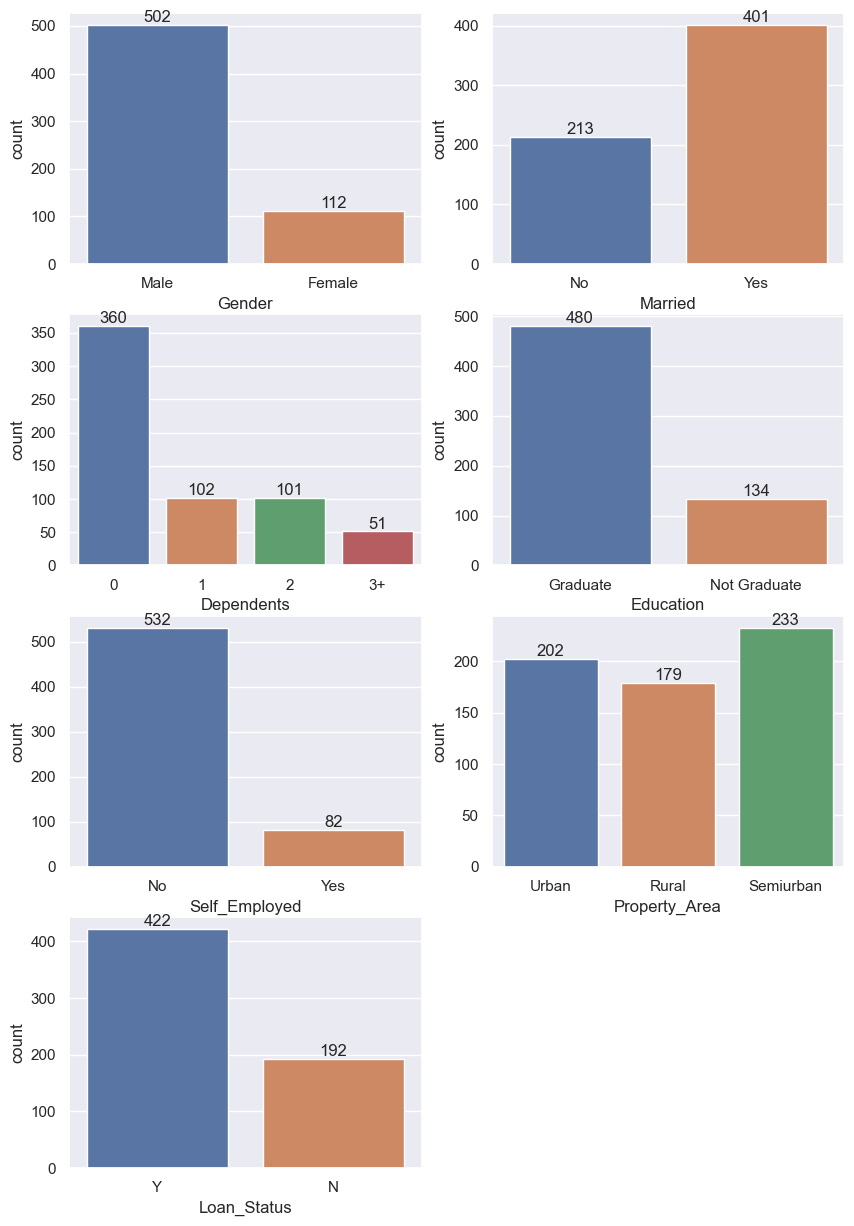

In [23]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)

    ax=sns.countplot(data=loan_df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

**Pie Chart**

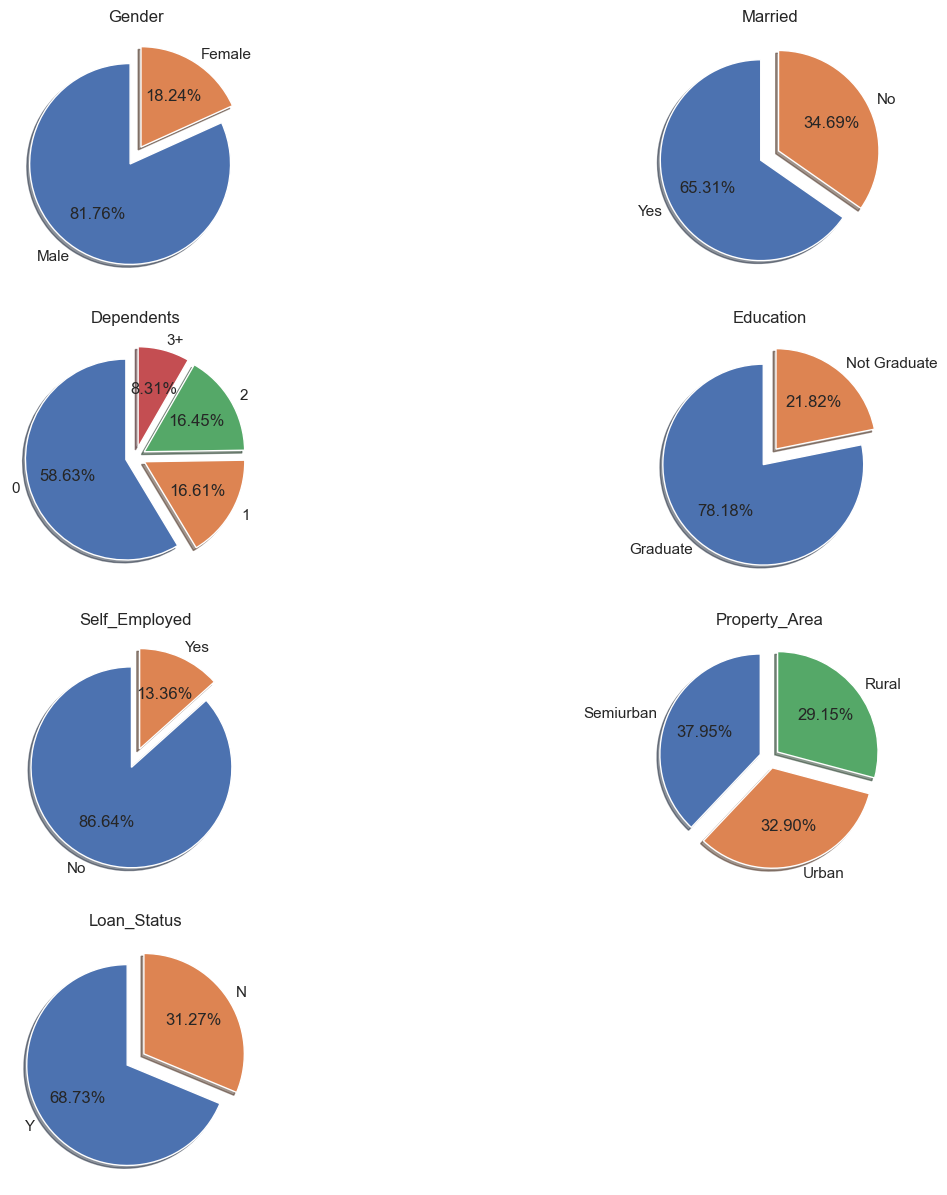

In [24]:
plt.figure(figsize=(15,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)
    loan_df[column].value_counts()
    Property=loan_df[column].value_counts(normalize=True).keys()
    count=loan_df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=loan_df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

**Bar Chart and Pie Chart**

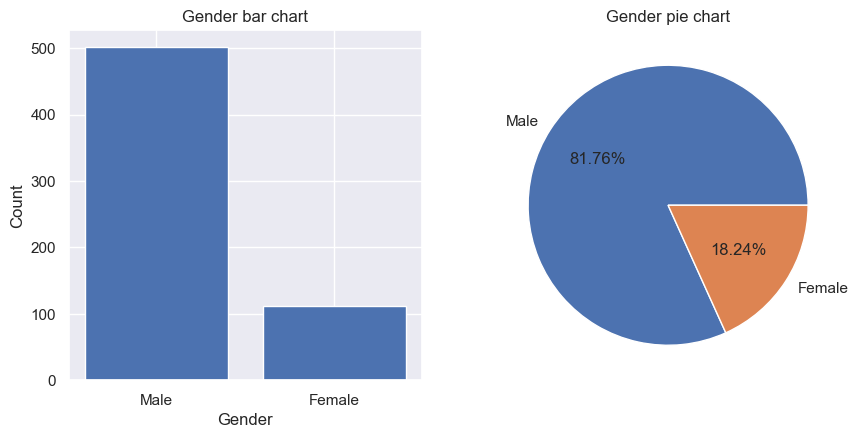

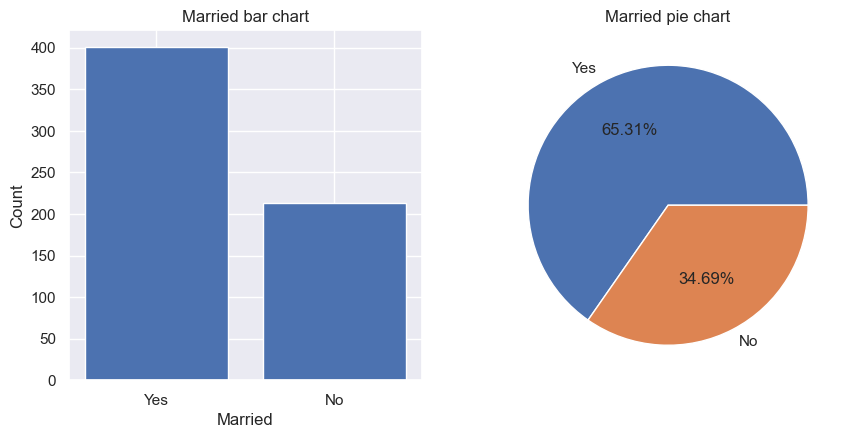

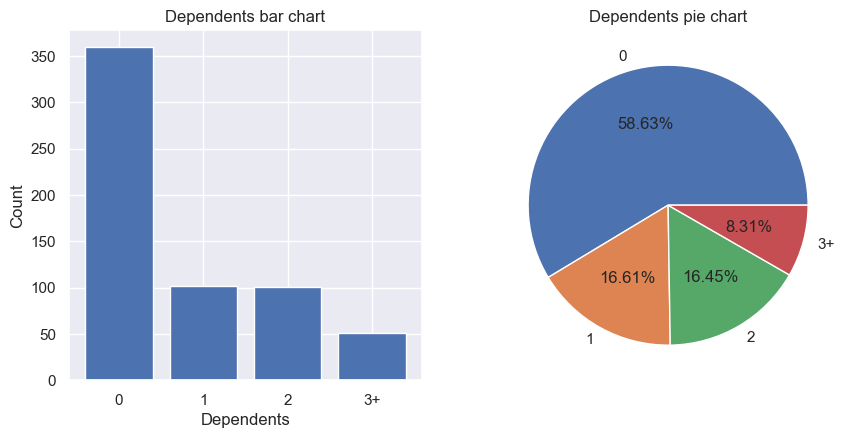

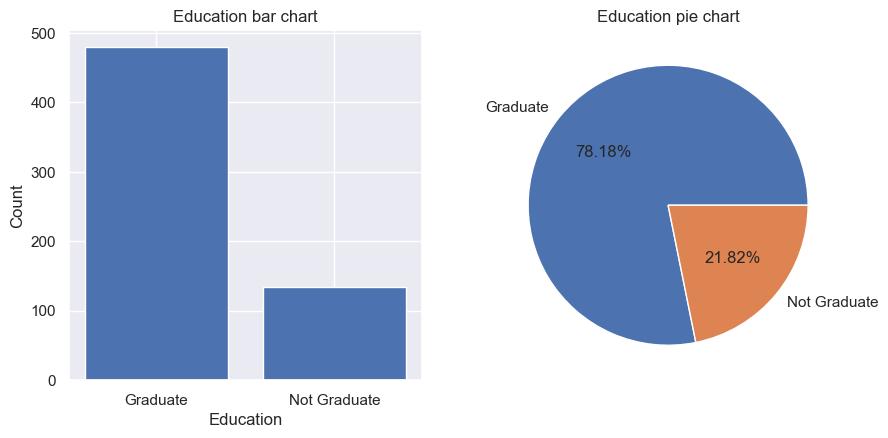

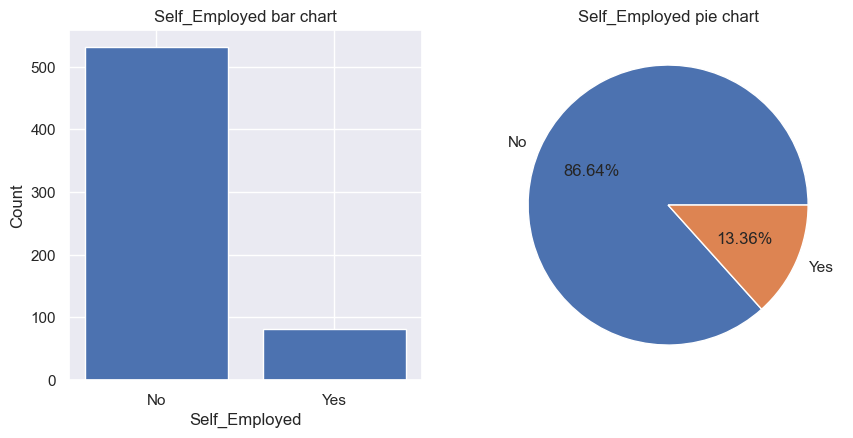

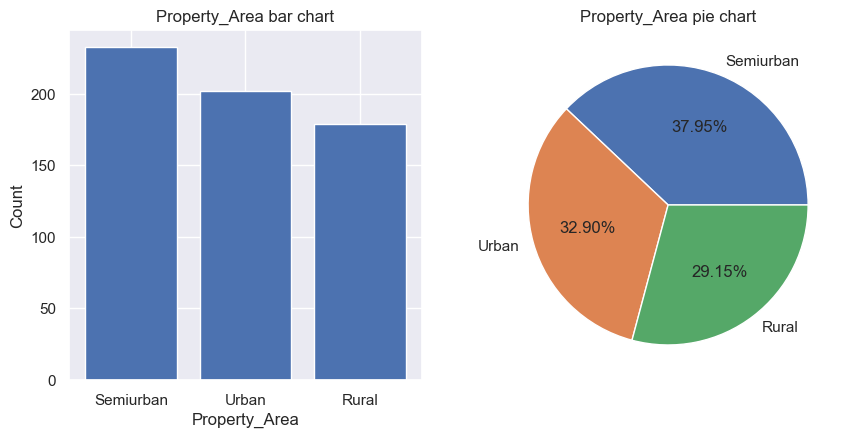

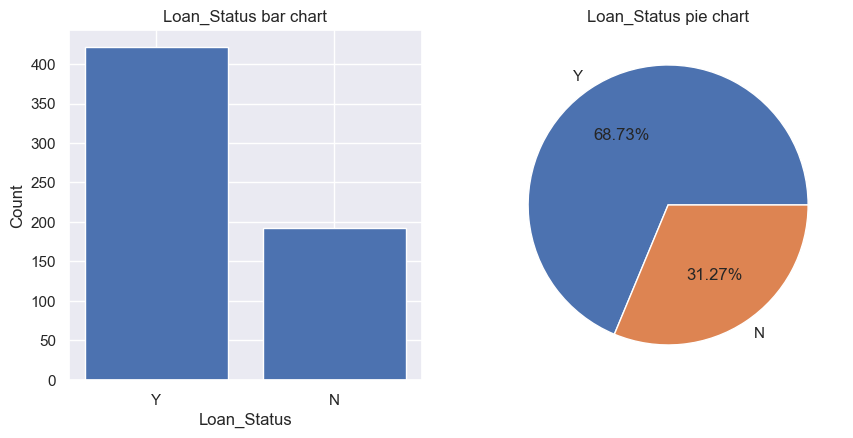

In [25]:
for column in cat:
    
    loan_df[column].value_counts()
    Property=loan_df[column].value_counts().keys()
    count=loan_df[column].value_counts().values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    Data
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title(f'{column} bar chart')
    plt.bar(column,'Count',data=Data)
    
    plt.xlabel(column)
    plt.ylabel('Count')
    
   
    plt.subplot(2,2,2)
    plt.title(f'{column} pie chart')
    plt.pie(x=count,labels=Property,autopct='%0.2f%%')
    
    plt.show()

**Numerical Data Analysis**

In [26]:
for i in num:
    d_count=round(loan_df[i].count(),2)
    d_max=round(loan_df[i].max(),2)
    d_min=round(loan_df[i].min(),2)
    d_mean=round(loan_df[i].mean(),2)
    d_median=round(loan_df[i].median(),2)
    d_std=round(loan_df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

ApplicantIncome count: 614
ApplicantIncome max: 81000
ApplicantIncome min: 150
ApplicantIncome mean: 5403.46
ApplicantIncome median: 3812.5
ApplicantIncome std: 6109.04
------------------------------------
CoapplicantIncome count: 614
CoapplicantIncome max: 41667.0
CoapplicantIncome min: 0.0
CoapplicantIncome mean: 1621.25
CoapplicantIncome median: 1188.5
CoapplicantIncome std: 2926.25
------------------------------------
LoanAmount count: 614
LoanAmount max: 700.0
LoanAmount min: 9.0
LoanAmount mean: 145.75
LoanAmount median: 128.0
LoanAmount std: 84.11
------------------------------------
Loan_Amount_Term count: 614
Loan_Amount_Term max: 0.08
Loan_Amount_Term min: 0.0
Loan_Amount_Term mean: 0.0
Loan_Amount_Term median: 0.0
Loan_Amount_Term std: 0.0
------------------------------------
Credit_History count: 614
Credit_History max: 1.0
Credit_History min: 0.0
Credit_History mean: 0.86
Credit_History median: 1.0
Credit_History std: 0.35
------------------------------------


In [27]:
for i in num:
    q1=np.quantile(loan_df[i],0.25)
    q2=np.quantile(loan_df[i],0.50)
    q3=np.quantile(loan_df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

ApplicantIncome q1: 2877.5
ApplicantIncome q2: 3812.5
ApplicantIncome q3: 3
------------
CoapplicantIncome q1: 0.0
CoapplicantIncome q2: 1188.5
CoapplicantIncome q3: 3
------------
LoanAmount q1: 100.25
LoanAmount q2: 128.0
LoanAmount q3: 3
------------
Loan_Amount_Term q1: 0.002777777777777778
Loan_Amount_Term q2: 0.002777777777777778
Loan_Amount_Term q3: 3
------------
Credit_History q1: 1.0
Credit_History q2: 1.0
Credit_History q3: 3
------------


In [28]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,0.003325,0.855049
std,6109.041673,2926.248369,84.107233,0.003773,0.352339
min,150.000000,0.000000,9.000000,0.002083,0.000000
25%,2877.500000,0.000000,100.250000,0.002778,1.000000
50%,3812.500000,1188.500000,128.000000,0.002778,1.000000
75%,5795.000000,2297.250000,164.750000,0.002778,1.000000
max,81000.000000,41667.000000,700.000000,0.083333,1.000000


**Histogram**

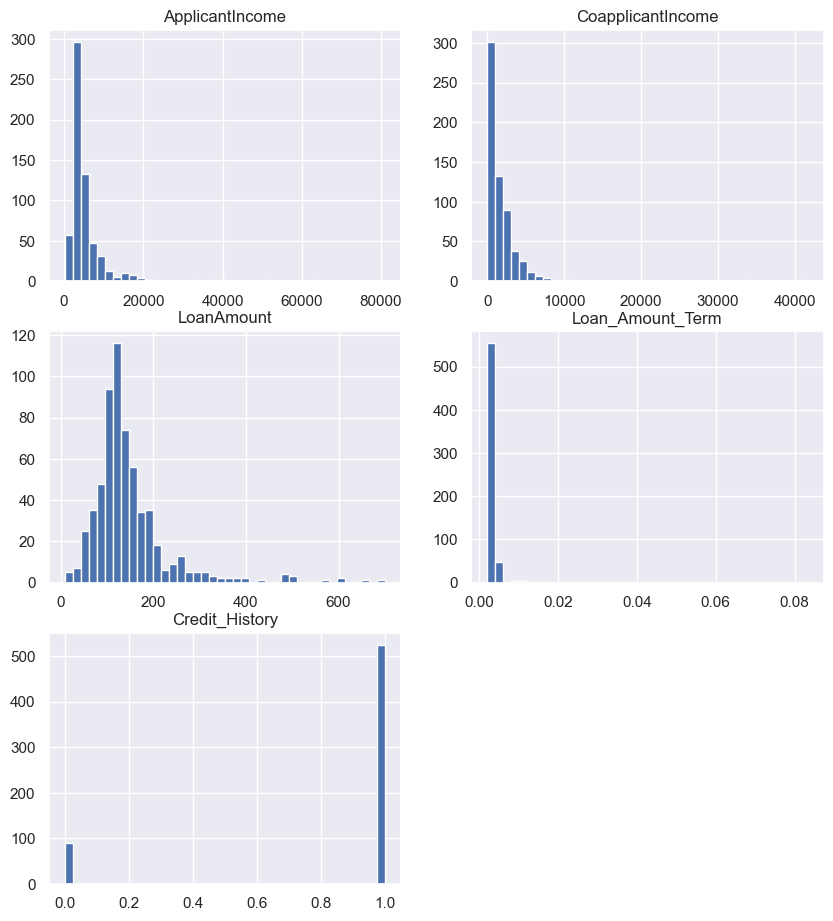

In [29]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(loan_df[column],bins=40)
plt.show()

**Empirical Rule**

In [30]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [31]:
mean=loan_df['ApplicantIncome'].mean()
std=loan_df['ApplicantIncome'].std()

In [32]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['ApplicantIncome']>val_minus_1
con2=loan_df['ApplicantIncome']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['ApplicantIncome']>val_minus_2
con4=loan_df['ApplicantIncome']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['ApplicantIncome']>val_minus_3
con6=loan_df['ApplicantIncome']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.9348534201954397
ep2: 0.9739413680781759
ep3: 0.9739413680781759


In [33]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['CoapplicantIncome']>val_minus_1
con2=loan_df['CoapplicantIncome']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['CoapplicantIncome']>val_minus_2
con4=loan_df['CoapplicantIncome']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['CoapplicantIncome']>val_minus_3
con6=loan_df['CoapplicantIncome']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.993485342019544
ep2: 0.993485342019544
ep3: 0.993485342019544


In [34]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['LoanAmount']>val_minus_1
con2=loan_df['LoanAmount']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['LoanAmount']>val_minus_2
con4=loan_df['LoanAmount']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['LoanAmount']>val_minus_3
con6=loan_df['LoanAmount']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [35]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['Loan_Amount_Term']>val_minus_1
con2=loan_df['Loan_Amount_Term']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['Loan_Amount_Term']>val_minus_2
con4=loan_df['Loan_Amount_Term']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['Loan_Amount_Term']>val_minus_3
con6=loan_df['Loan_Amount_Term']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [36]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['Credit_History']>val_minus_1
con2=loan_df['Credit_History']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['Credit_History']>val_minus_2
con4=loan_df['Credit_History']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['Credit_History']>val_minus_3
con6=loan_df['Credit_History']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [37]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

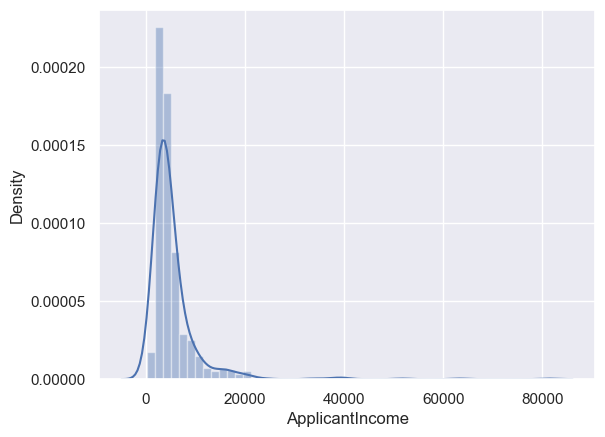

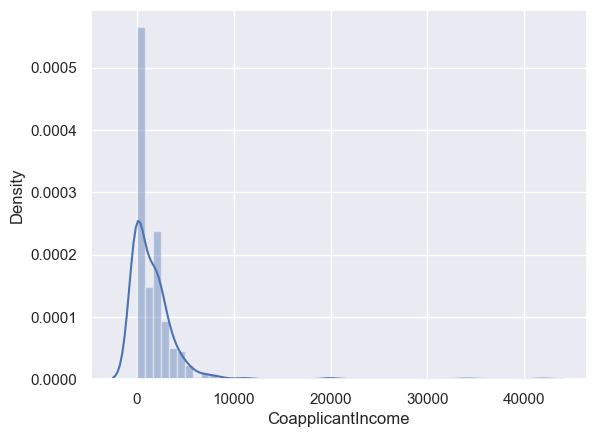

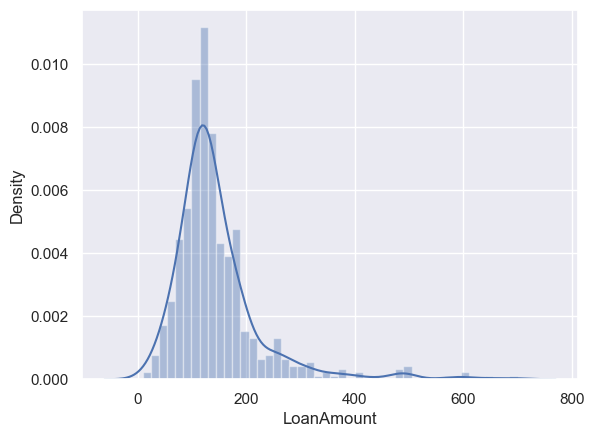

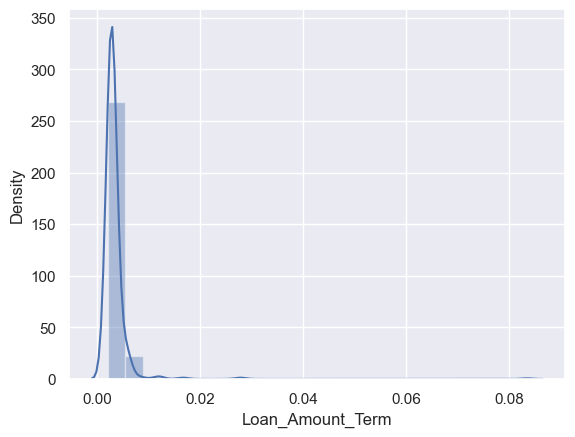

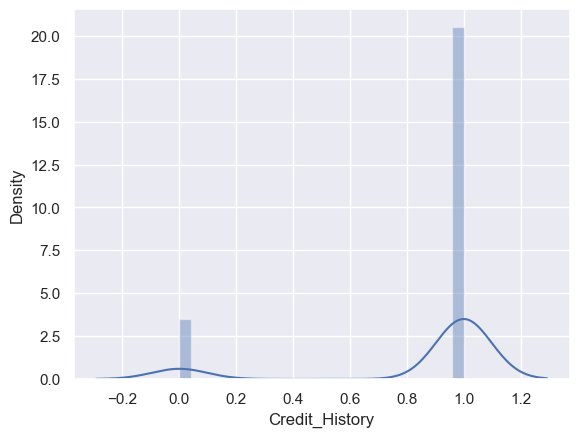

In [38]:
for i in num:
    sns.distplot(loan_df[i])
    plt.show()

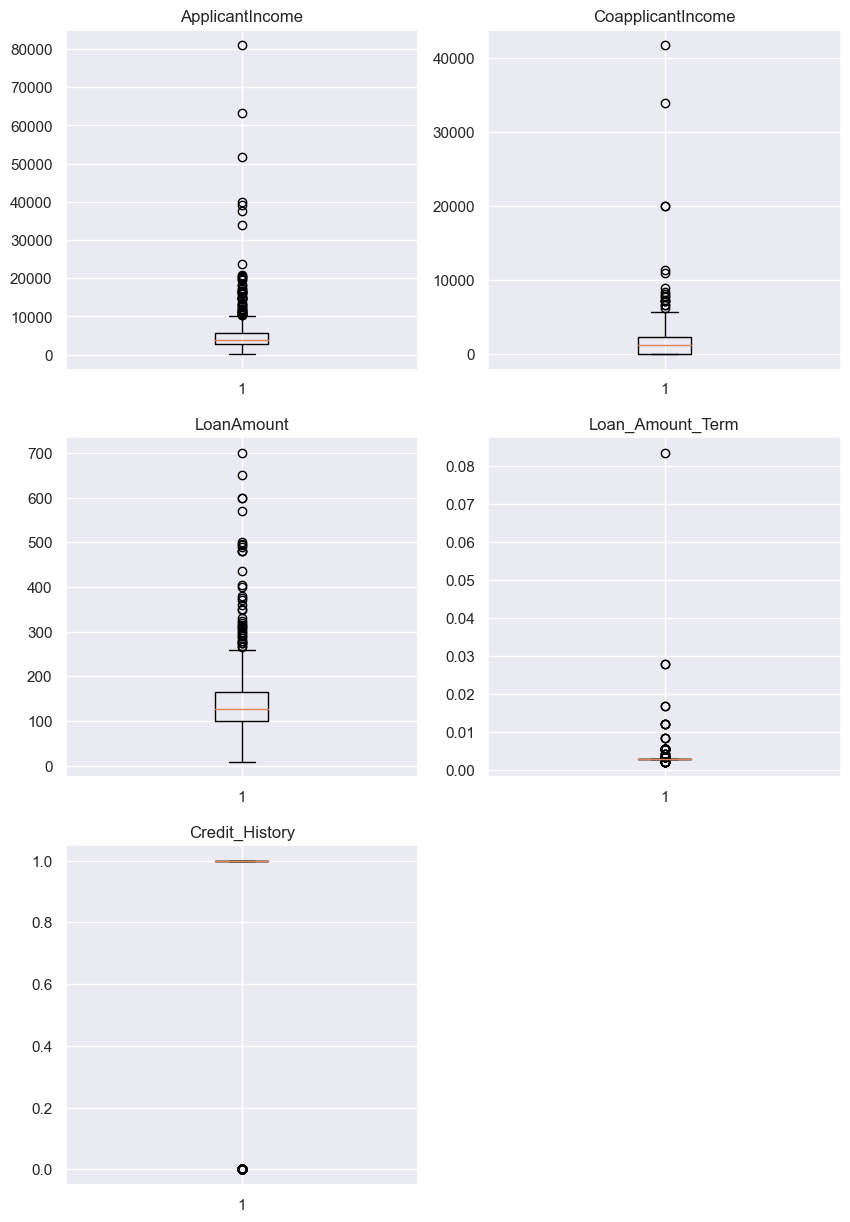

In [39]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(loan_df[column])
plt.show()

In [40]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [41]:
q1=np.quantile(loan_df['ApplicantIncome'],0.25)
q2=np.quantile(loan_df['ApplicantIncome'],0.50)
q3=np.quantile(loan_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=loan_df['ApplicantIncome']>ub1
con2=loan_df['ApplicantIncome']<lb1
outlier=loan_df[con1|con2]
len(outlier)

50

In [42]:
q1=np.quantile(loan_df['ApplicantIncome'],0.25)
q2=np.quantile(loan_df['ApplicantIncome'],0.50)
q3=np.quantile(loan_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=loan_df['ApplicantIncome']<ub1
con2=loan_df['ApplicantIncome']>lb1
non_outlier=loan_df[con1&con2]
len(non_outlier)

564

In [43]:
## percentage of outliers

v=(len(outlier)/len(loan_df))*100
v

8.143322475570033

**Coapplicant Income**

In [44]:
q1=np.quantile(loan_df['CoapplicantIncome'],0.25)
q2=np.quantile(loan_df['CoapplicantIncome'],0.50)
q3=np.quantile(loan_df['CoapplicantIncome'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=loan_df['CoapplicantIncome']>ub2
con2=loan_df['CoapplicantIncome']<lb2
outlier2=loan_df[con1|con2]
len(outlier2)

18

In [45]:
## percentage of outliers

v=(len(outlier2)/len(loan_df))*100
v

2.9315960912052117

In [46]:
q1=np.quantile(loan_df['CoapplicantIncome'],0.25)
q2=np.quantile(loan_df['CoapplicantIncome'],0.50)
q3=np.quantile(loan_df['CoapplicantIncome'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=loan_df['CoapplicantIncome']<ub2
con2=loan_df['CoapplicantIncome']>lb2
non_outlier2=loan_df[con1&con2]
len(non_outlier2)

596

**LoanAmount**

In [47]:
q1=np.quantile(loan_df['LoanAmount'],0.25)
q2=np.quantile(loan_df['LoanAmount'],0.50)
q3=np.quantile(loan_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=loan_df['LoanAmount']>ub3
con2=loan_df['LoanAmount']<lb3
outlier3=loan_df[con1|con2]
len(outlier3)

41

In [48]:

v=(len(outlier3)/len(loan_df))*100
v

6.677524429967427

In [49]:
q1=np.quantile(loan_df['LoanAmount'],0.25)
q2=np.quantile(loan_df['LoanAmount'],0.50)
q3=np.quantile(loan_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=loan_df['LoanAmount']<ub3
con2=loan_df['LoanAmount']>lb3
non_outlier3=loan_df[con1&con2]
len(non_outlier3)

573

In [50]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [51]:
loan_df["ApplicantIncome"]=np.clip(loan_df['ApplicantIncome'],lb1,ub1)

In [52]:
len(loan_df['ApplicantIncome'])

614

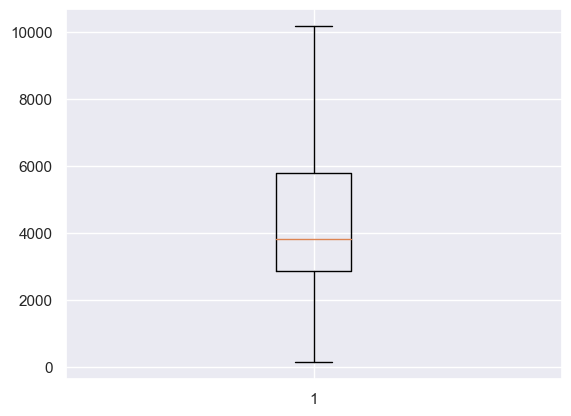

In [53]:
plt.boxplot(loan_df['ApplicantIncome'])
plt.show()

In [54]:
loan_df["CoapplicantIncome"]=np.clip(loan_df['CoapplicantIncome'],lb2,ub2)

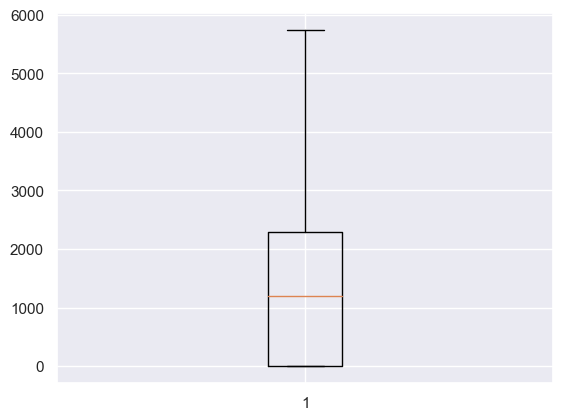

In [55]:
plt.boxplot(loan_df['CoapplicantIncome'])
plt.show()

In [56]:
loan_df["LoanAmount"]=np.clip(loan_df['LoanAmount'],lb3,ub3)

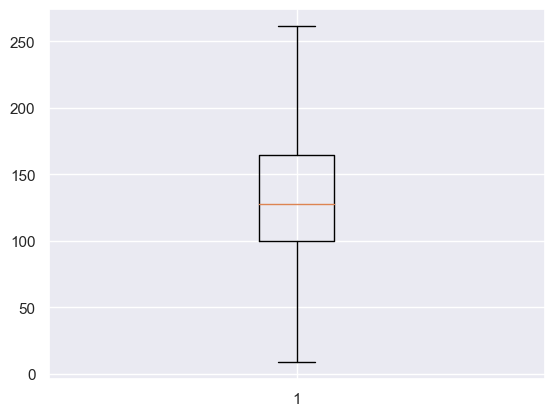

In [57]:
plt.boxplot(loan_df['LoanAmount'])
plt.show()

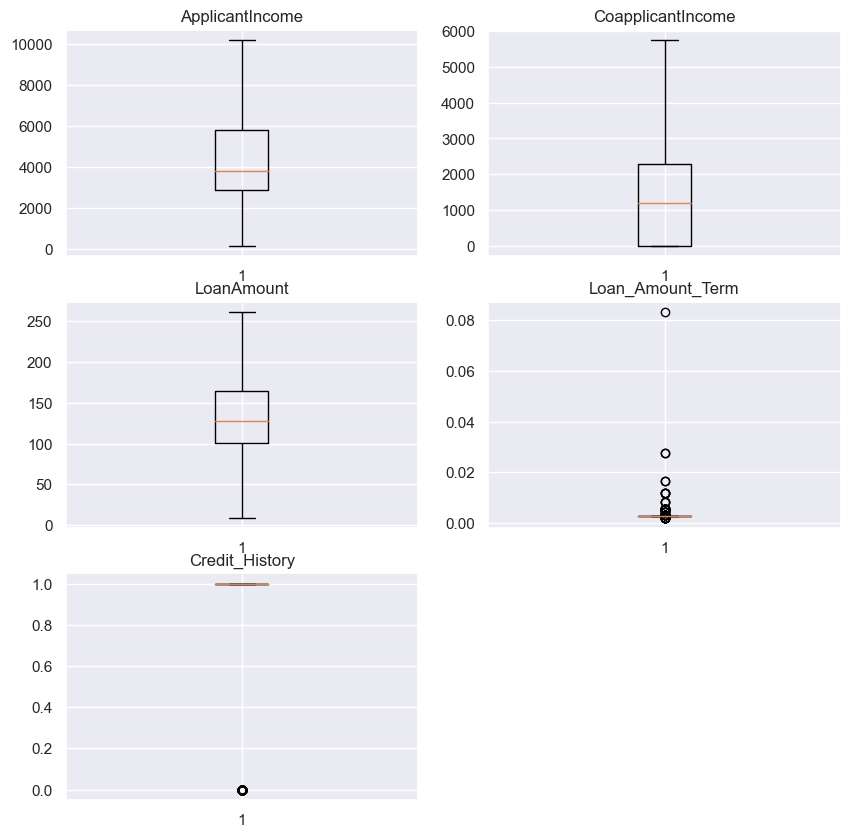

In [58]:
plt.figure(figsize=(10,10))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(loan_df[column])
plt.show()

**Bivariate Analysis**

In [59]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

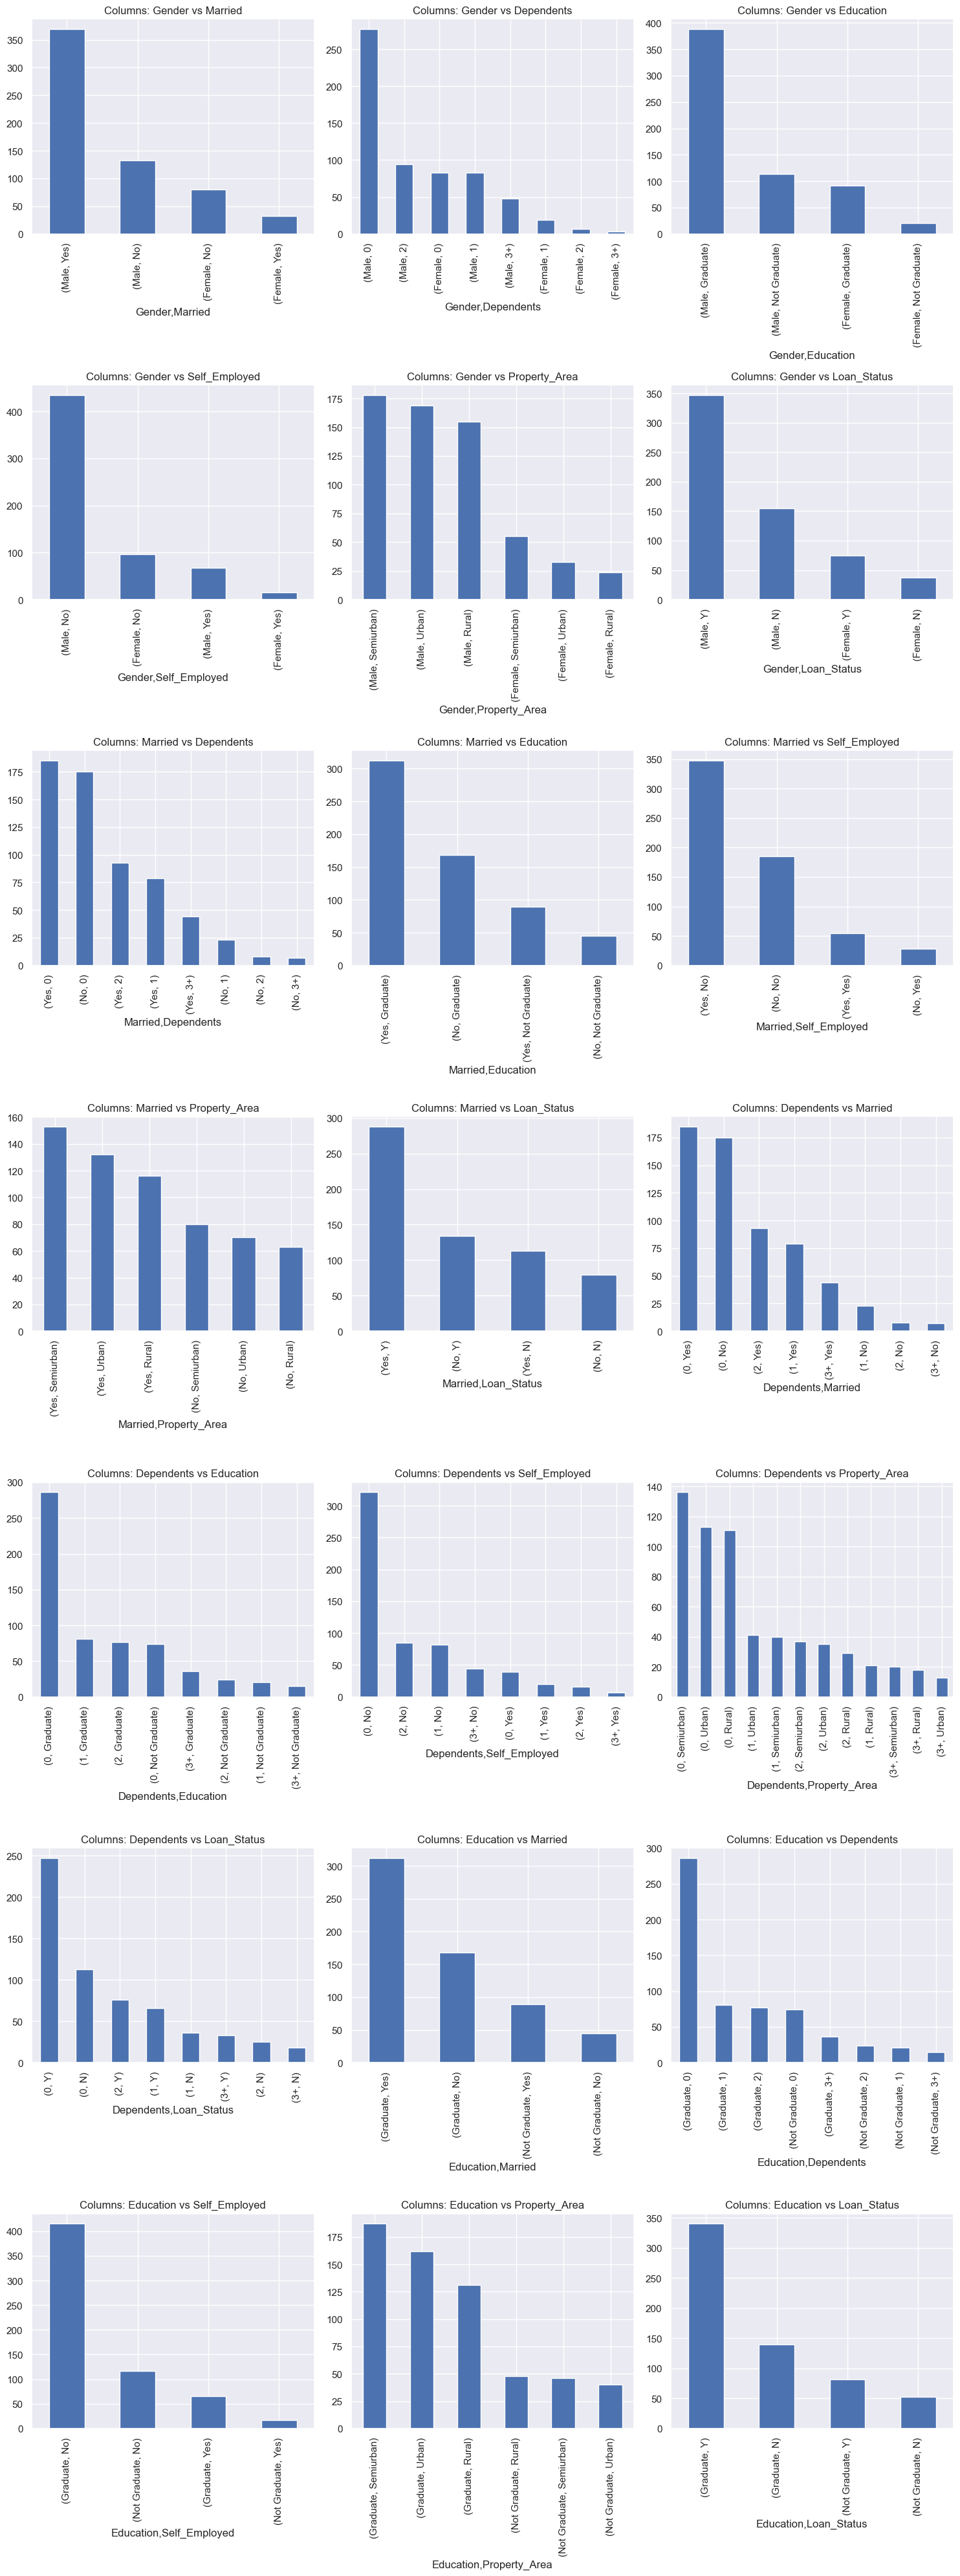

In [60]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 7 * 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 40))  # 9 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in cat:
    for j in cat[1:]:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 3, plot_counter % 3]  # Get the current subplot
            loan_df[[i, j]].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**MUltivariate**

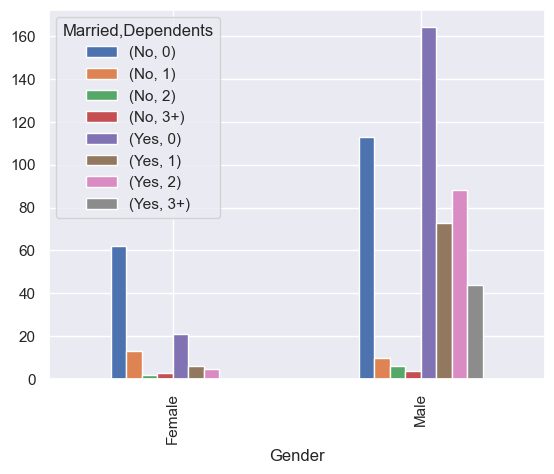

In [61]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Dependents']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

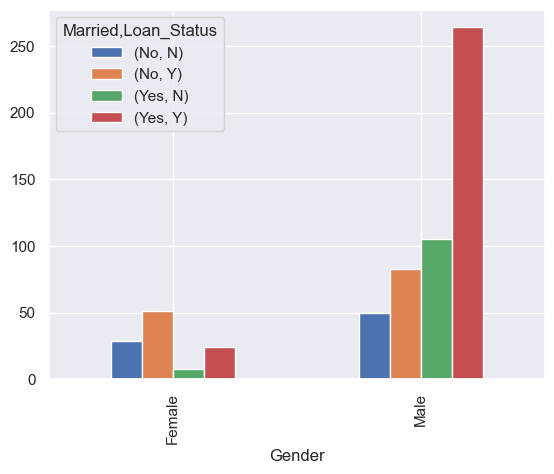

In [62]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Loan_Status']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

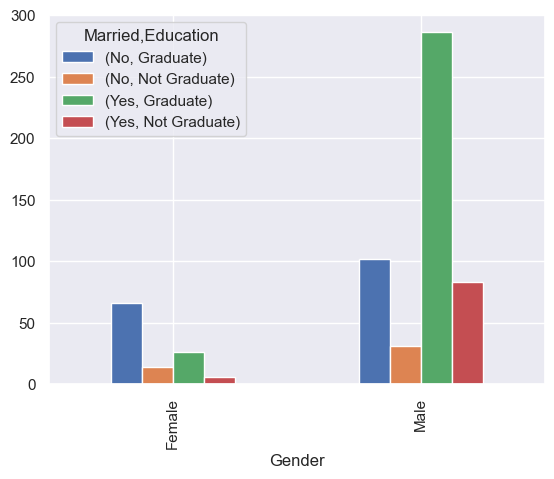

In [63]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Education']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

**NUmerical VS Numerical**

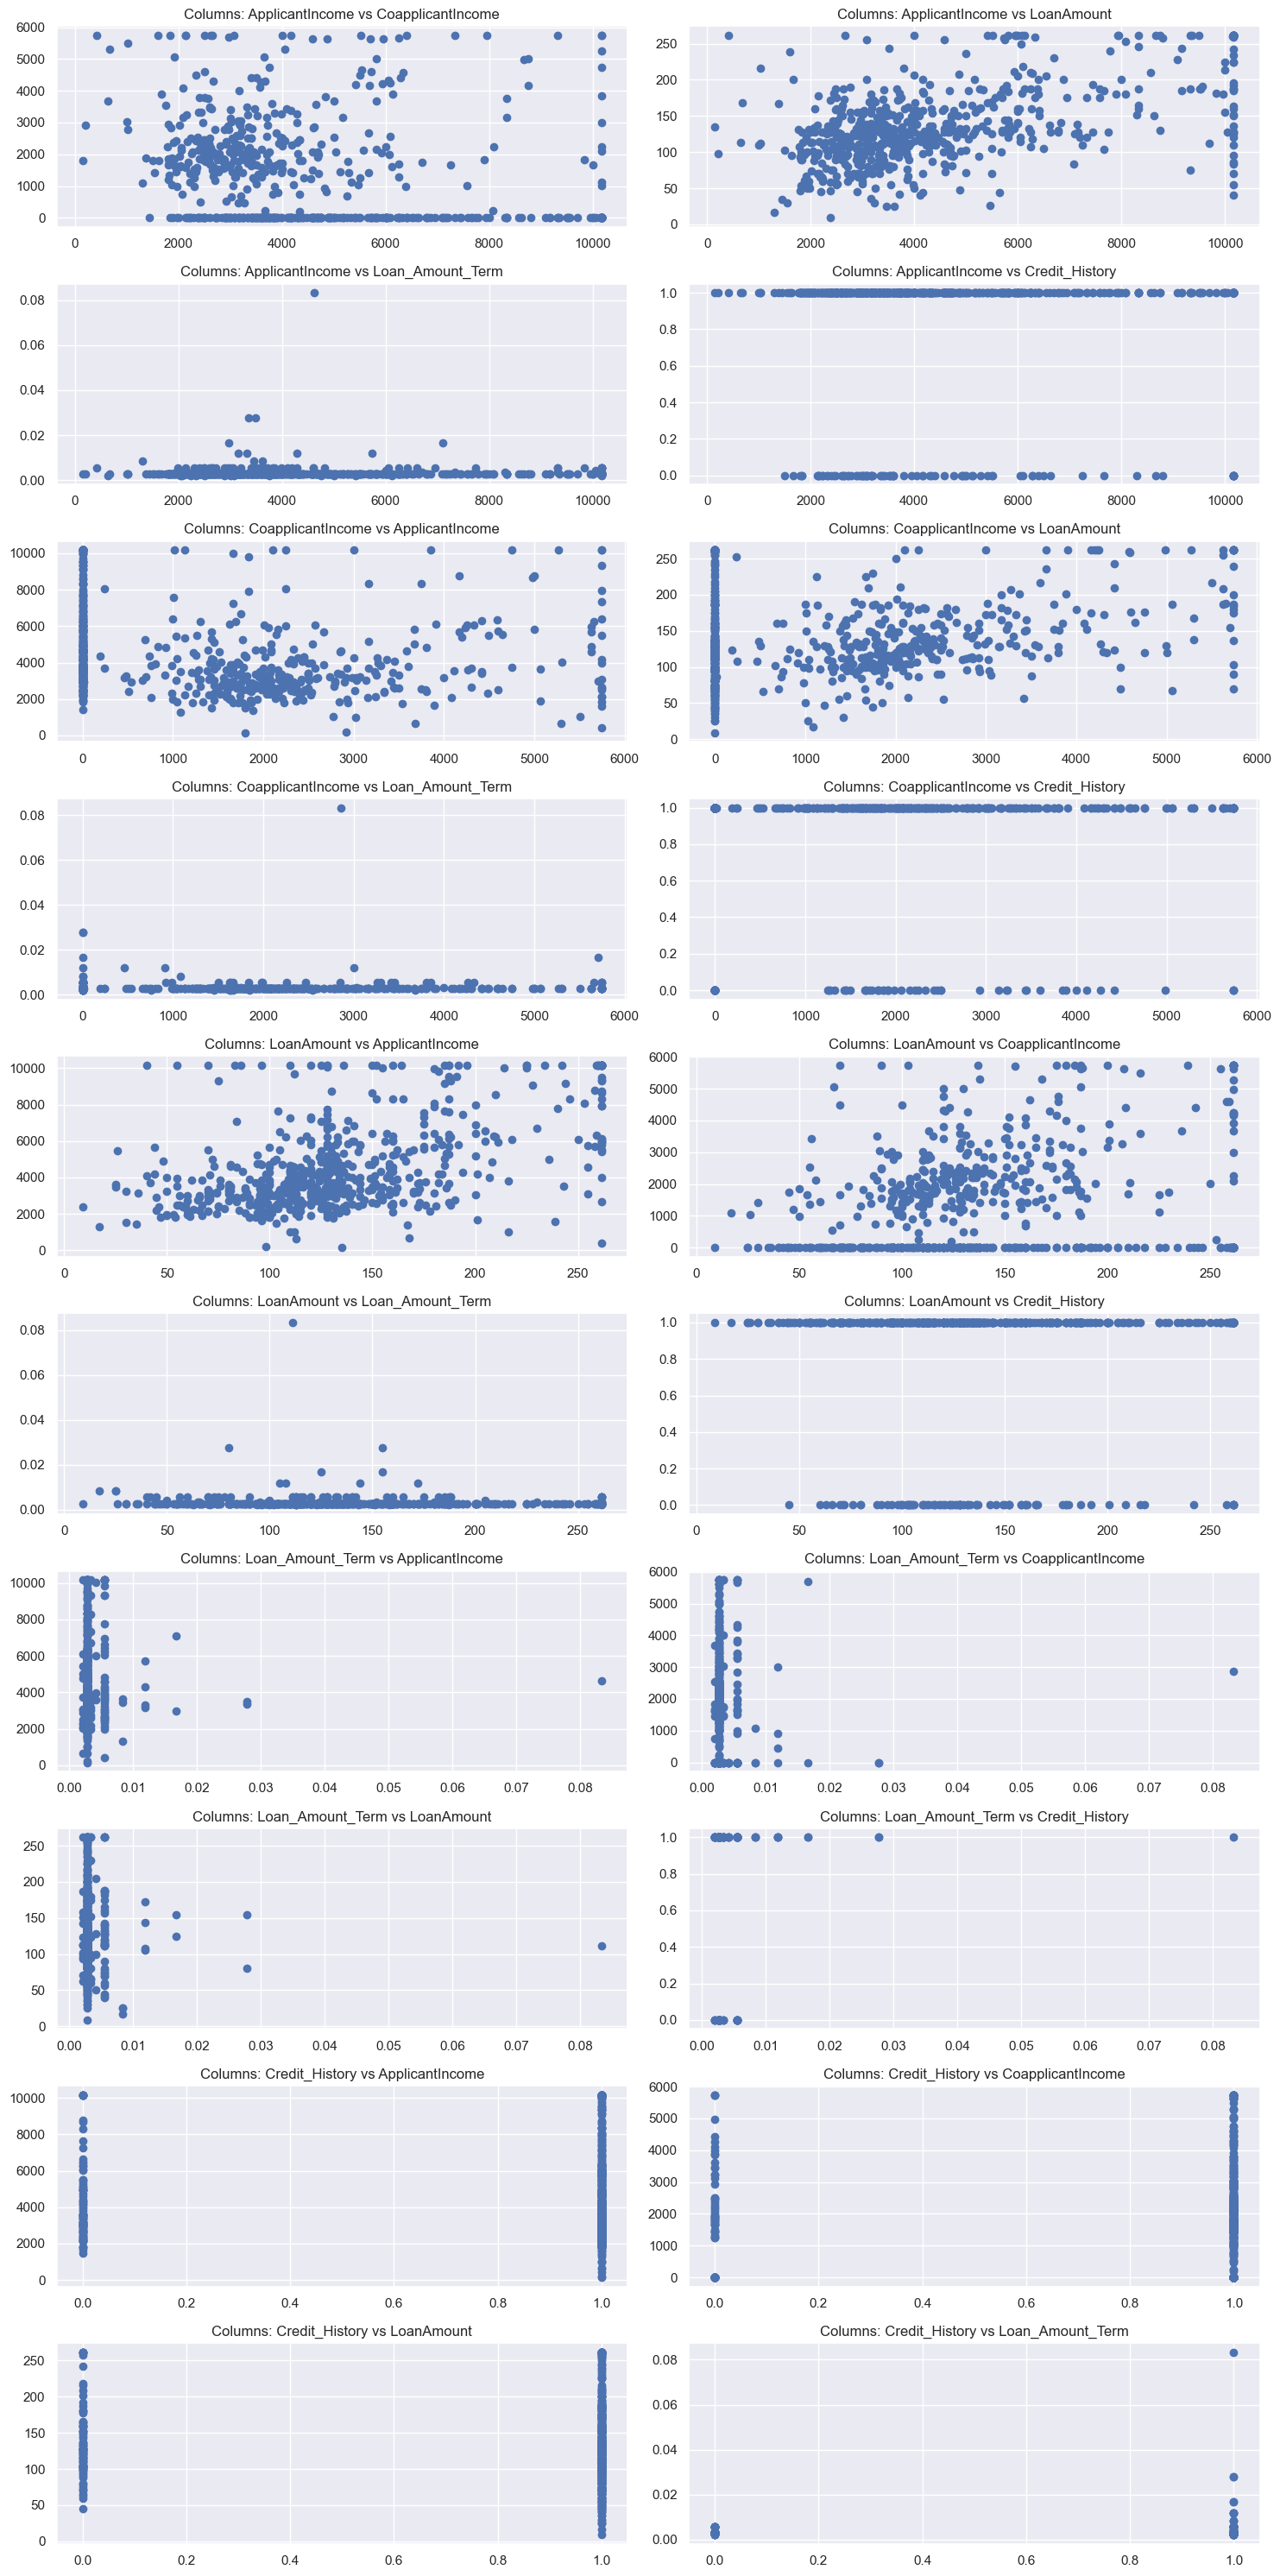

In [64]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 10 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(loan_df[i], loan_df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Correlation**

In [65]:
corr=loan_df.corr(numeric_only=True)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.228956,0.557953,-0.007432,0.035345
CoapplicantIncome,-0.228956,1.000000,0.265021,0.023348,-0.001710
LoanAmount,0.557953,0.265021,1.000000,-0.045127,0.004320
Loan_Amount_Term,-0.007432,0.023348,-0.045127,1.000000,0.027060
Credit_History,0.035345,-0.001710,0.004320,0.027060,1.000000


**HeatMap**

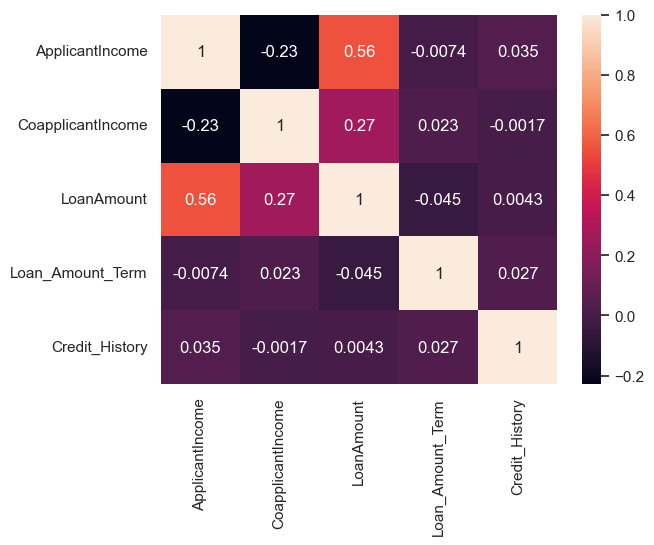

In [66]:
sns.heatmap(corr,annot=True)
plt.show()

**Check the Skew**

In [67]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 1.0398459567416636
CoapplicantIncome 1.012762761452279
LoanAmount 0.6836926591947383
Loan_Amount_Term 16.745060654552233
Credit_History -2.0219705924848985


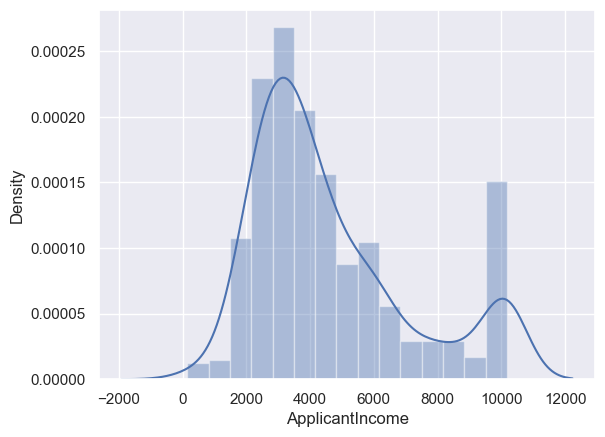

In [68]:
sns.distplot(loan_df['ApplicantIncome'])
plt.show()

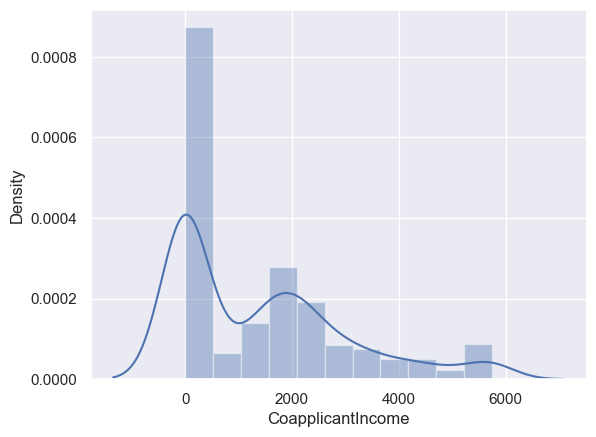

In [69]:
sns.distplot(loan_df['CoapplicantIncome'])
plt.show()



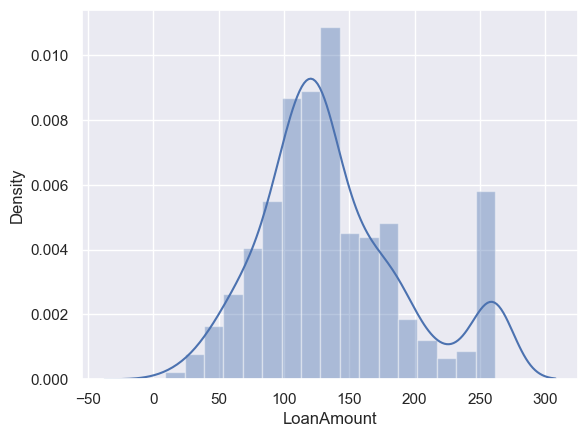

In [70]:
sns.distplot(loan_df['LoanAmount'])
plt.show()

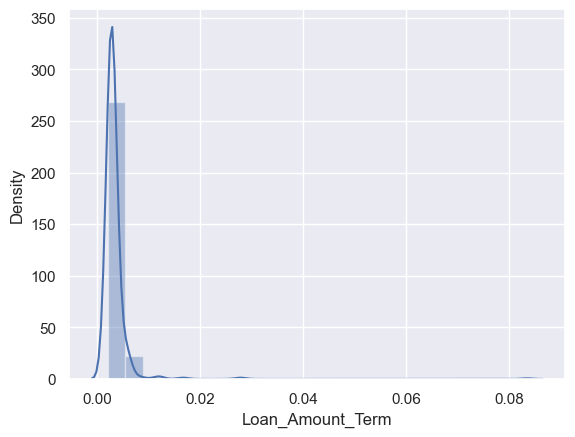

In [71]:
sns.distplot(loan_df['Loan_Amount_Term'])
plt.show()

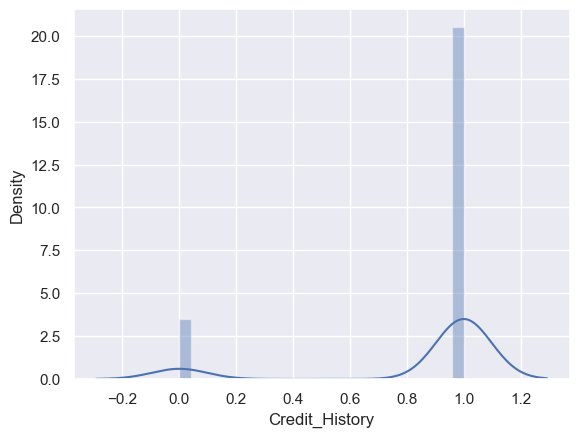

In [72]:
sns.distplot(loan_df['Credit_History'])
plt.show()

In [73]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 1.0398459567416636
CoapplicantIncome 1.012762761452279
LoanAmount 0.6836926591947383
Loan_Amount_Term 16.745060654552233
Credit_History -2.0219705924848985


In [74]:
loan_df['ApplicantIncome'] = np.log1p(loan_df['ApplicantIncome'])

In [75]:
loan_df['CoapplicantIncome']=np.log1p(loan_df['CoapplicantIncome'])

In [76]:
loan_df['Loan_Amount_Term']=1/(loan_df['Loan_Amount_Term']) # Reciprocal

In [77]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome -0.5921163155786792
CoapplicantIncome -0.18493191866102224
LoanAmount 0.6836926591947383
Loan_Amount_Term -2.4021122563890396
Credit_History -2.0219705924848985


In [78]:
loan_df['Credit_History'].unique()

array([1., 0.])

In [79]:
loan_df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [80]:
# loan_df['Loan_Amount_Term']**27

In [81]:
# loan_df['Loan_Amount_Term'].skew()

In [82]:
# loan_df['Credit_History']**27

In [83]:
# loan_df['Credit_History'].skew()


**Convert Categorical Into Numerical**

In [84]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    loan_df[i]=le.fit_transform(loan_df[i])

In [85]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,128.0,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,120.0,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,71.0,360.0,1.0,0,1
610,1,1,3,0,0,8.320448,0.000000,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8.996280,5.484797,253.0,360.0,1.0,2,1
612,1,1,2,0,0,8.933796,0.000000,187.0,360.0,1.0,2,1


**Machine Learning**

In [86]:
X=loan_df.drop('Loan_Status',axis=1)

y=loan_df['Loan_Status']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [89]:
print(loan_df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 12)
(491, 11)
(123, 11)
(491,)
(123,)


**Decision Tree**

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

**Prediction**

In [91]:
y_pred_dt=dtree.predict(X_test)


**Metrices**

In [92]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)



In [93]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 70.73
F1 is: 0.78
Precision is: 0.82
Recall is: 0.74
              precision    recall  f1-score   support

           0       0.53      0.64      0.58        39
           1       0.82      0.74      0.78        84

    accuracy                           0.71       123
   macro avg       0.67      0.69      0.68       123
weighted avg       0.73      0.71      0.71       123



**Confusion Metrices**

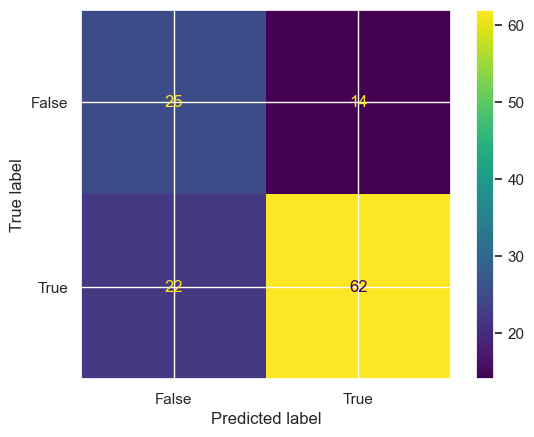

In [94]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [95]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 25
False postive: 14
False negative: 22
True postive: 62


**ROC-AUC Curve**

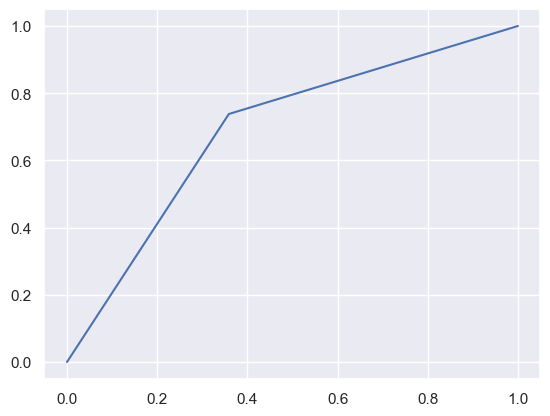

In [96]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**Logistic Regression**

In [97]:

from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)


LogisticRegression()

**Prediction**

In [98]:
y_pred_log=logtree.predict(X_test)

**Metrices**

In [99]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 25
False postive: 14
False negative: 22
True postive: 62


**Confusion Metrices**

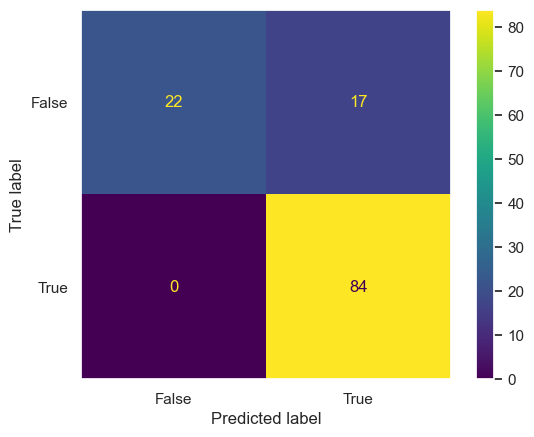

In [100]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [101]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 22
False postive: 17
False negative: 0
True postive: 84


**ROC AUC Curve**

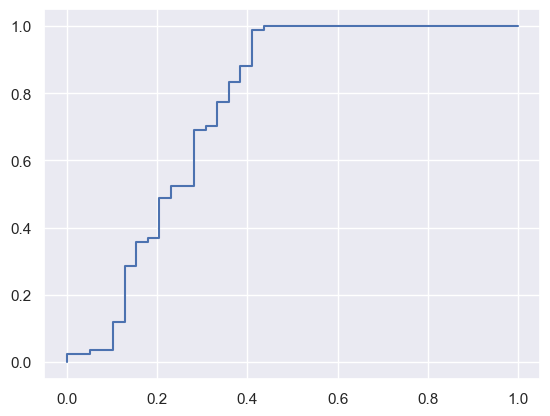

In [102]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Naive Bayes**

In [103]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

**Prediction**

In [104]:
y_pred_NB=NBtree.predict(X_test)

**Metrices**

In [105]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 85.37
F1 is: 0.9
Precision is: 0.83
Recall is: 0.99


**Confusion Metrices**

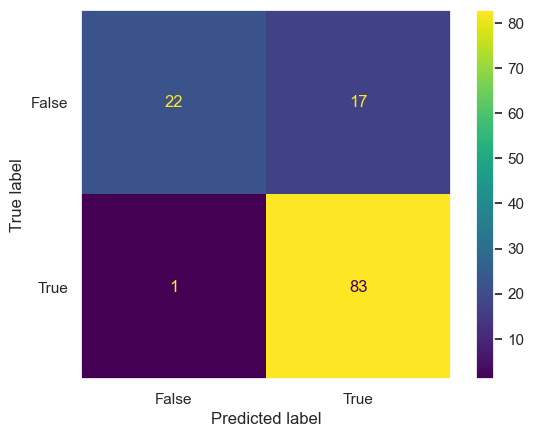

In [106]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [107]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 22
False postive: 17
False negative: 1
True postive: 83


**ROC AUC Curve**

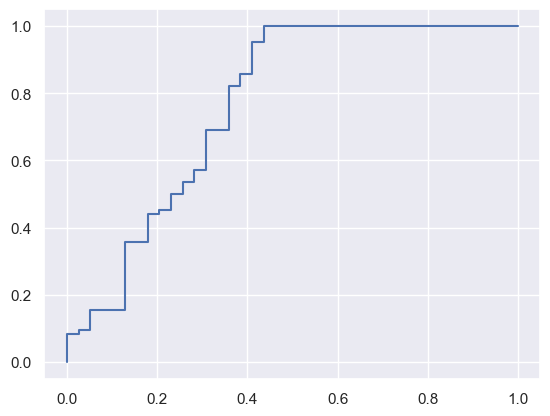

In [108]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [109]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

KNeighborsClassifier()

**Prediction**

In [110]:
y_pred_KNN=KNNtree.predict(X_test)

**Metrices**

In [111]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 64.23
F1 is: 0.76
Precision is: 0.7
Recall is: 0.85


**Confusion Metrices**

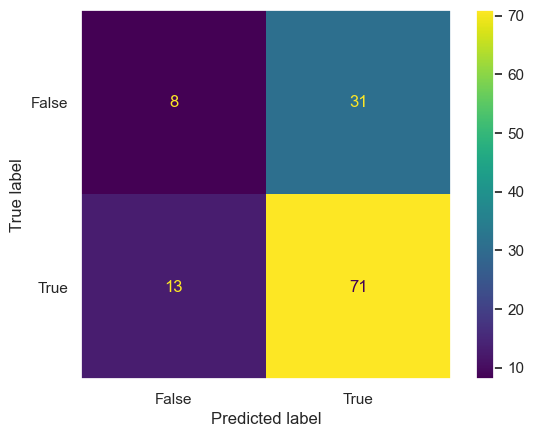

In [112]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [113]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 8
False postive: 31
False negative: 13
True postive: 71


**ROC AUC CURVE**

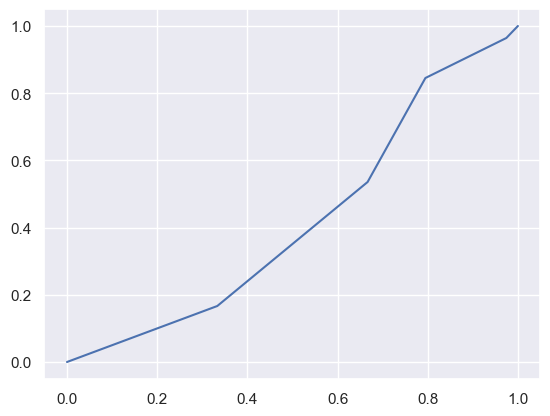

In [114]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Random Forest**

In [115]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)


RandomForestClassifier()

**Prediction**

In [116]:
y_pred_RF=RFtree.predict(X_test)

**Metrices**

In [117]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 83.74
F1 is: 0.89
Precision is: 0.83
Recall is: 0.95


**Confusion Metrices**

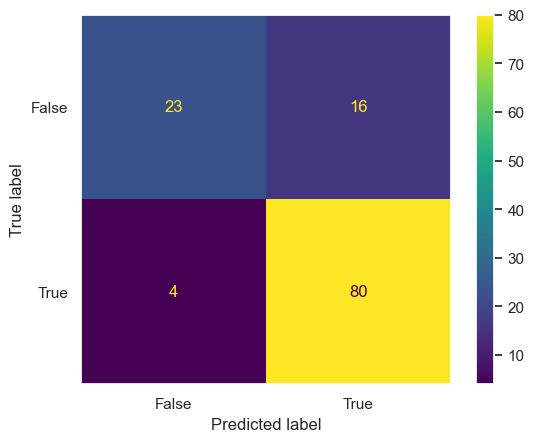

In [118]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


In [119]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 23
False postive: 16
False negative: 4
True postive: 80


**ROC AUC Curve**

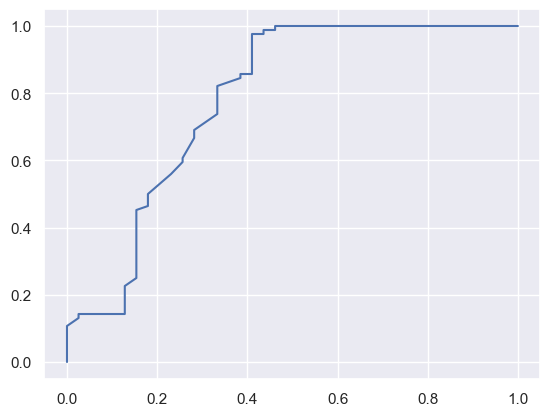

In [120]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Gradient Boosting**

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

**Prediction**

In [122]:
y_pred_GB=RFtree.predict(X_test)

**Metrices**

In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_GB= round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)


accuray is: 83.74
F1 is: 0.89
Precision is: 0.83
Recall is: 0.95


**Confusion Metrices**

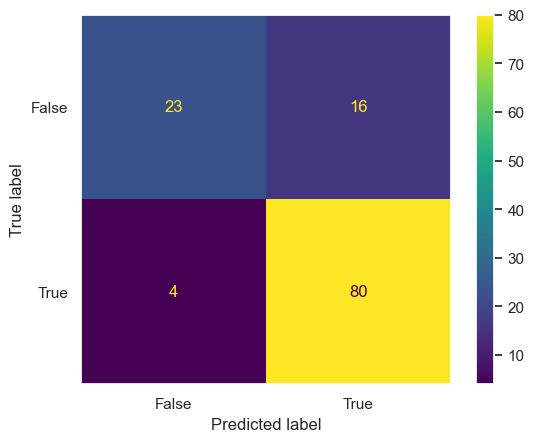

In [124]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_GB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [125]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 23
False postive: 16
False negative: 4
True postive: 80


**ROC AUC Curve**

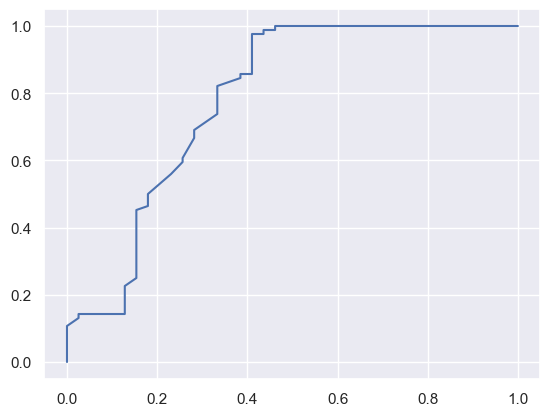

In [126]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Comparing Which Model is best**

In [127]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,Precision,Recall,F1-score
DT,70.73,0.82,0.74,0.78
KNN,64.23,0.70,0.85,0.76
Logistic,86.18,0.83,1.00,0.91
Naive Bayes,85.37,0.83,0.99,0.90
Random Forest,83.74,0.83,0.95,0.89
Gradient Boosting,83.74,0.83,0.95,0.89


# Model devlopment using Hyper parameter tuning

1**DecisionTree**

In [128]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,128.0,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,120.0,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,71.0,360.0,1.0,0,1
610,1,1,3,0,0,8.320448,0.000000,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8.996280,5.484797,253.0,360.0,1.0,2,1
612,1,1,2,0,0,8.933796,0.000000,187.0,360.0,1.0,2,1


In [129]:
X=loan_df.drop('Loan_Status',axis=1)

y=loan_df['Loan_Status']

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [131]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [132]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [133]:
gt=DecisionTreeClassifier()
gt

DecisionTreeClassifier()

In [134]:
gt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [135]:
param_gt={
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0,42]
}

In [136]:
import time
start=time.time()
gt_search=GridSearchCV(gt,param_gt,
                      scoring='accuracy',
                      cv=5,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [137]:
gt_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [138]:
start=time.time()
gt_search.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
total time taken is: 8.655545234680176


In [139]:
gt.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
gt_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=0)

In [141]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=6,
                            min_samples_leaf=4,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=0)

In [142]:
gt_search.best_score_

0.7861678004535146

In [143]:
gt_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [144]:
# prediction
y_pred_gt=dtree.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [146]:
# Matrix
acc_gt=round(accuracy_score(y_test,y_pred_gt)*100,2)
f1_gt=round(f1_score(y_test,y_pred_gt),2)
recall_gt=round(recall_score(y_test,y_pred_gt),2)
precision_gt=round(precision_score(y_test,y_pred_gt))

print("accuracy is:",acc_gt)
print("f1 is:",f1_gt)
print("recall is:",recall_gt)
print("precision is:",precision_gt)

accuracy is: 76.42
f1 is: 0.83
recall is: 0.86
precision is: 1


In [147]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


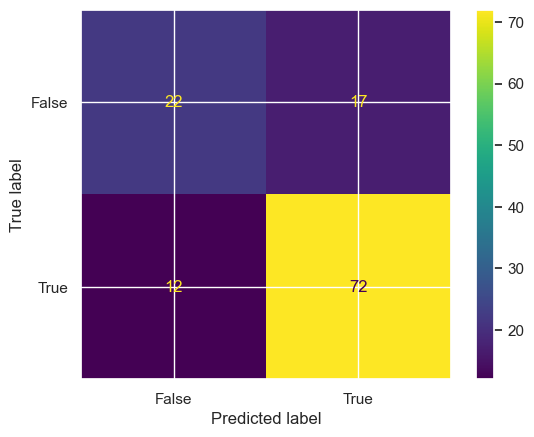

In [148]:
cmt=confusion_matrix(y_test,y_pred_gt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [150]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_gt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 23
False postive: 17
False negative: 12
True postive: 72


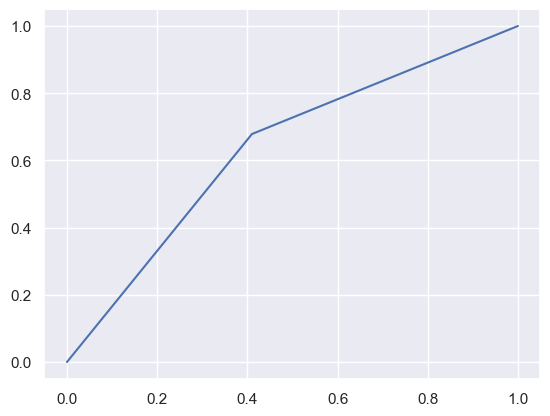

In [151]:
# ROC-AUC Curve
y_gt_pred_prob=gt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_gt_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [152]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
f1 = imp_df.sort_values(by="Importance", ascending=False)
f1

,Feature Name,Importance
9,Credit_History,0.560918
5,ApplicantIncome,0.163541
6,CoapplicantIncome,0.101461
7,LoanAmount,0.101361
10,Property_Area,0.036562
8,Loan_Amount_Term,0.025555
0,Gender,0.010602
1,Married,0.000000
2,Dependents,0.000000
3,Education,0.000000


2**Logistic Regreesion**

In [153]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()


LogisticRegression()

In [154]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [155]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [156]:
param_grid1={
    'C':[1.1,'entropy'],
    'intercept_scaling': [4, 5, 6, 7, 8,9],
    'fit_intercept': [True],
    'warm_start': [False],
    'max_iter': [0,41]
}

In [157]:
import time
start=time.time()
grid_search1=GridSearchCV(grid_log,param_grid1,
                      scoring='accuracy',
                      cv=4,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [158]:
grid_search1.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.1, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 5, 6, 7, 8, 9],
                         'max_iter': [0, 41], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [159]:
grid_search1.best_estimator_

LogisticRegression(C=1.1, intercept_scaling=4, max_iter=41)

In [160]:
from sklearn.linear_model import LogisticRegression
import time

logistic_regression = LogisticRegression()
start = time.time()
grid_search1.fit(X_train, y_train)
end = time.time()
print('Total time taken is:', (end - start), 'seconds')


Fitting 4 folds for each of 24 candidates, totalling 96 fits
Total time taken is: 0.7377777099609375 seconds


In [161]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                       fit_intercept= True,
                       intercept_scaling= 4,
                       max_iter=42,
                       warm_start= False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

In [162]:
grid_search1.best_score_

0.706800613088098

In [163]:
grid_search1.best_params_

{'C': 1.1,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 41,
 'warm_start': False}

In [164]:
# prediction
y_pred_log=log.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [166]:
# Matrix
acc_log=round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log))

print("accuracy is:",acc_log)
print("f1 is:",f1_log)
print("recall is:",recall_log)
print("precision is:",precision_log)

accuracy is: 68.29
f1 is: 0.81
recall is: 0.99
precision is: 1


In [167]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

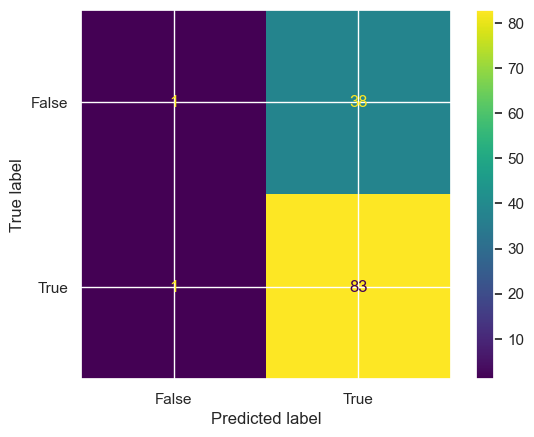

In [168]:
cmt=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [169]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 23
False postive: 38
False negative: 1
True postive: 83


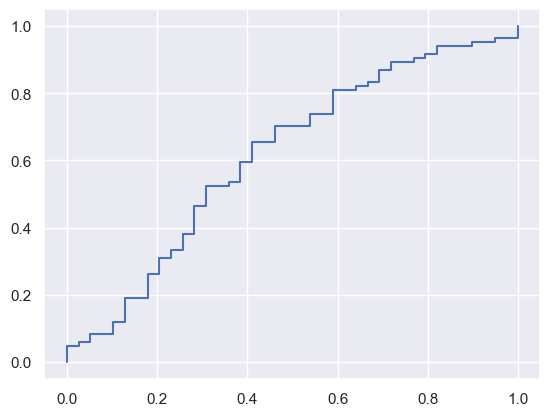

In [170]:
# ROC-AUC Curve
y_log_pred_prob=grid_search1.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob)
plt.plot(fpr,tpr)
plt.show()

3**Naive Bayes**

In [171]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [172]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_NB=GaussianNB()
grid_NB

GaussianNB()

In [173]:
grid_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [174]:
param_NB1={
    'priors':[None],
    'var_smoothing': [0.001]
}

In [175]:
import time
start=time.time()
grid_search2=GridSearchCV(grid_NB,param_NB1,
                      scoring='accuracy',
                      cv=3,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [176]:
grid_search2

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [0.001]},
             scoring='accuracy', verbose=True)

In [177]:
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None], 'var_smoothing': [0.001]},
             scoring='accuracy', verbose=True)

In [178]:
start=time.time()
grid_search2.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
total time taken is: 0.031720638275146484


In [179]:
grid_search2.best_estimator_

GaussianNB(var_smoothing=0.001)

In [180]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None, var_smoothing= 0.001)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.001)

In [181]:
grid_search2.best_score_

0.6597959998004889

In [182]:
grid_search2.best_params_

{'priors': None, 'var_smoothing': 0.001}

In [183]:
# prediction
y_pred_NB=NB.predict(X_test)

In [184]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [185]:
# Matrix
acc_NB=round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB))

print("accuracy is:",acc_NB)
print("f1 is:",f1_NB)
print("recall is:",recall_NB)
print("precision is:",precision_NB)

accuracy is: 64.23
f1 is: 0.78
recall is: 0.94
precision is: 1


In [186]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

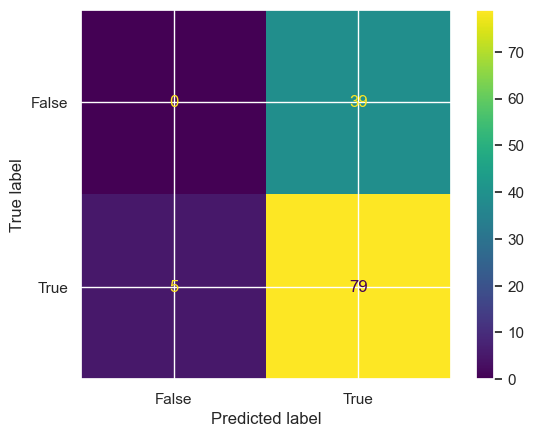

In [187]:
cmt=confusion_matrix(y_test,y_pred_NB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [188]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 23
False postive: 39
False negative: 5
True postive: 79


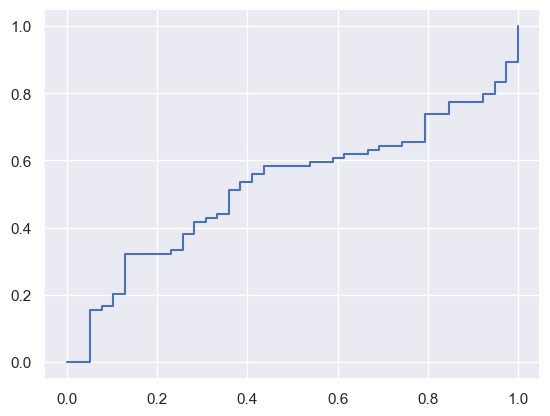

In [189]:
# ROC-AUC Curve
y_NB_pred_prob=grid_search2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

4**KNN**

In [190]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [191]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()
grid_KNN

KNeighborsClassifier()

In [192]:
grid_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [193]:
param_KNN={
    'n_neighbors': [3,4,5,6],
    'leaf_size': [34,12],
    'algorithm':['auto','ball_tree','kd_tree','brute']
    
}

In [194]:
import time
start=time.time()
grid_search3=GridSearchCV(grid_KNN,param_KNN,
                      scoring='accuracy',
                      cv=3,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [195]:
grid_search3

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [34, 12], 'n_neighbors': [3, 4, 5, 6]},
             scoring='accuracy', verbose=True)

In [196]:
start=time.time()
grid_search3.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
total time taken is: 3.340481996536255


In [197]:
grid_search3.best_estimator_

KNeighborsClassifier(leaf_size=34)

In [198]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors= 12)
KN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [199]:
grid_search3.best_score_

0.674173275475086

In [200]:
grid_search3.best_params_

{'algorithm': 'auto', 'leaf_size': 34, 'n_neighbors': 5}

In [201]:
# prediction
y_pred_KNN=KN.predict(X_test)

In [202]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [203]:
# Matrix
acc_KNN=round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN))

print("accuracy is:",acc_KNN)
print("f1 is:",f1_KNN)
print("recall is:",recall_KNN)
print("precision is:",precision_KNN)

accuracy is: 60.98
f1 is: 0.75
recall is: 0.85
precision is: 1


In [204]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

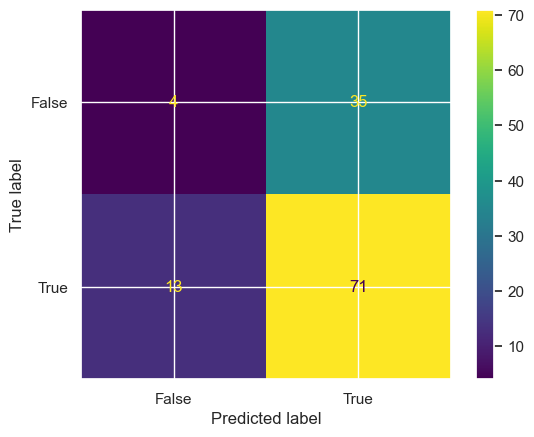

In [205]:
cmt=confusion_matrix(y_test,y_pred_KNN)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [206]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 23
False postive: 35
False negative: 13
True postive: 71


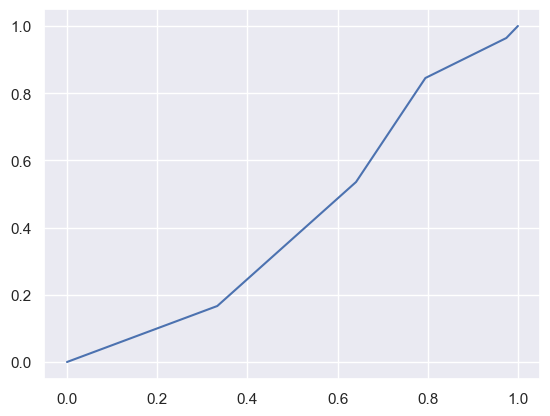

In [207]:
# ROC-AUC Curve
y_KNN_pred_prob=grid_search3.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob)
plt.plot(fpr,tpr)
plt.show()

5**Random Forest**

In [208]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier()

In [209]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()
grid_RF

RandomForestClassifier()

In [210]:
grid_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [211]:
param_RF={
    'min_samples_leaf': [3,4,5,6],
    'oob_score': [False],
    'criterion':['gini']
    
}

In [212]:
import time
start=time.time()
grid_search4=GridSearchCV(grid_RF,param_RF,
                      scoring='accuracy',
                      cv=4,
                      verbose=True)
end=time.time()
print('total time taken is:',(end-start))

total time taken is: 0.0


In [213]:
grid_search4

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'oob_score': [False]},
             scoring='accuracy', verbose=True)

In [214]:
start=time.time()
grid_search4.fit(X_train,y_train)

end=time.time()
print('total time taken is:',(end-start))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
total time taken is: 2.9689810276031494


In [215]:
grid_search4.best_estimator_

RandomForestClassifier(min_samples_leaf=6)

In [216]:
from sklearn.ensemble import RandomForestClassifier
RFTree=RandomForestClassifier(criterion='gini',
                              max_depth= 5,
                              max_features='sqrt',
                              n_estimators=100,
                              random_state=0)
RFTree.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [217]:
grid_search4.best_score_

0.7942656270825004

In [218]:
grid_search4.best_params_

{'criterion': 'gini', 'min_samples_leaf': 6, 'oob_score': False}

In [219]:
# prediction
y_pred_RF=RFTree.predict(X_test)

In [220]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [221]:
# Matrix
acc_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF))

print("accuracy is:",acc_RF)
print("f1 is:",f1_RF)
print("recall is:",recall_RF)
print("precision is:",precision_RF)

accuracy is: 84.55
f1 is: 0.9
recall is: 0.98
precision is: 1


In [222]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

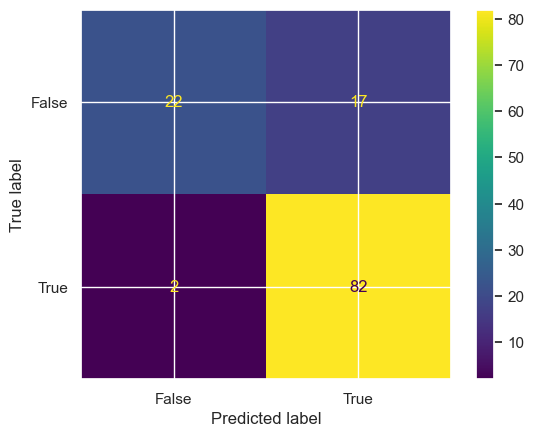

In [223]:
cmt=confusion_matrix(y_test,y_pred_RF)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels=[False,True])
disp.plot()
plt.show()

In [224]:
y_traintn, fp, fn, tp =confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 23
False postive: 17
False negative: 2
True postive: 82


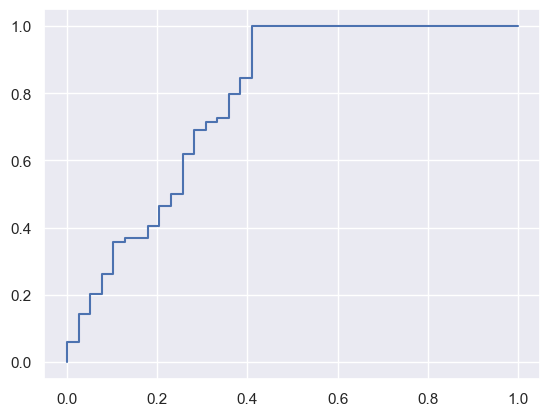

In [225]:
# ROC-AUC Curve
y_RF_pred_prob=grid_search4.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [226]:
dict1={'Accuracy':[acc_gt,acc_KNN,acc_log,acc_NB,acc_RF],
      'precision':[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      'recall':[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      'f1-score':[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}
pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,precision,recall,f1-score
DT,76.42,0.82,0.74,0.78
KNN,60.98,1.00,0.85,0.75
Logistic,68.29,1.00,0.99,0.81
Naive Bayes,64.23,1.00,0.94,0.78
Random Forest,84.55,1.00,0.98,0.90


In [227]:
import pickle
pickle.dump(RFTree,open("loan_best_model",'wb'))

In [228]:
y_pred_RF

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])